<a href="https://colab.research.google.com/github/04khofifah/DA_RevoU/blob/main/Data_Cleaning_Grup_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For general purposes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/REVOU_DA/hotel_bookings.csv')


In [ ]:
# Set display to max columns
# Mengatur tampilan untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
# Look at the head of the dataset

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
# Getting all of the data type info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data Cleaning and Preprocessing**

In [ ]:
# Checking null value/megecek nilai null

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# 2. Changing NaN data in Agent into 0
# 3. Changing NaN data in Country into Unknown
# 4. Changing NaN data in Children into 0

nan_replacements = {"childrens":0.0,"country":"Unknown","agent":0}

df = df.fillna(nan_replacements)

In [ ]:
# menghapus 'company' columns
df = df.drop(columns=[ 'company'])

In [ ]:
# Checking the null values

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

 memiliki 488 missing values in Country column, Jadi akan di ganti dengan negara yang  paling sering dikunjungi

In [ ]:
# Ganti nilai yang hilang di kolom 'Country' dengan negara yang paling sering dikunjungi
seringDikunjungi_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(seringDikunjungi_country)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Describe the dataset

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


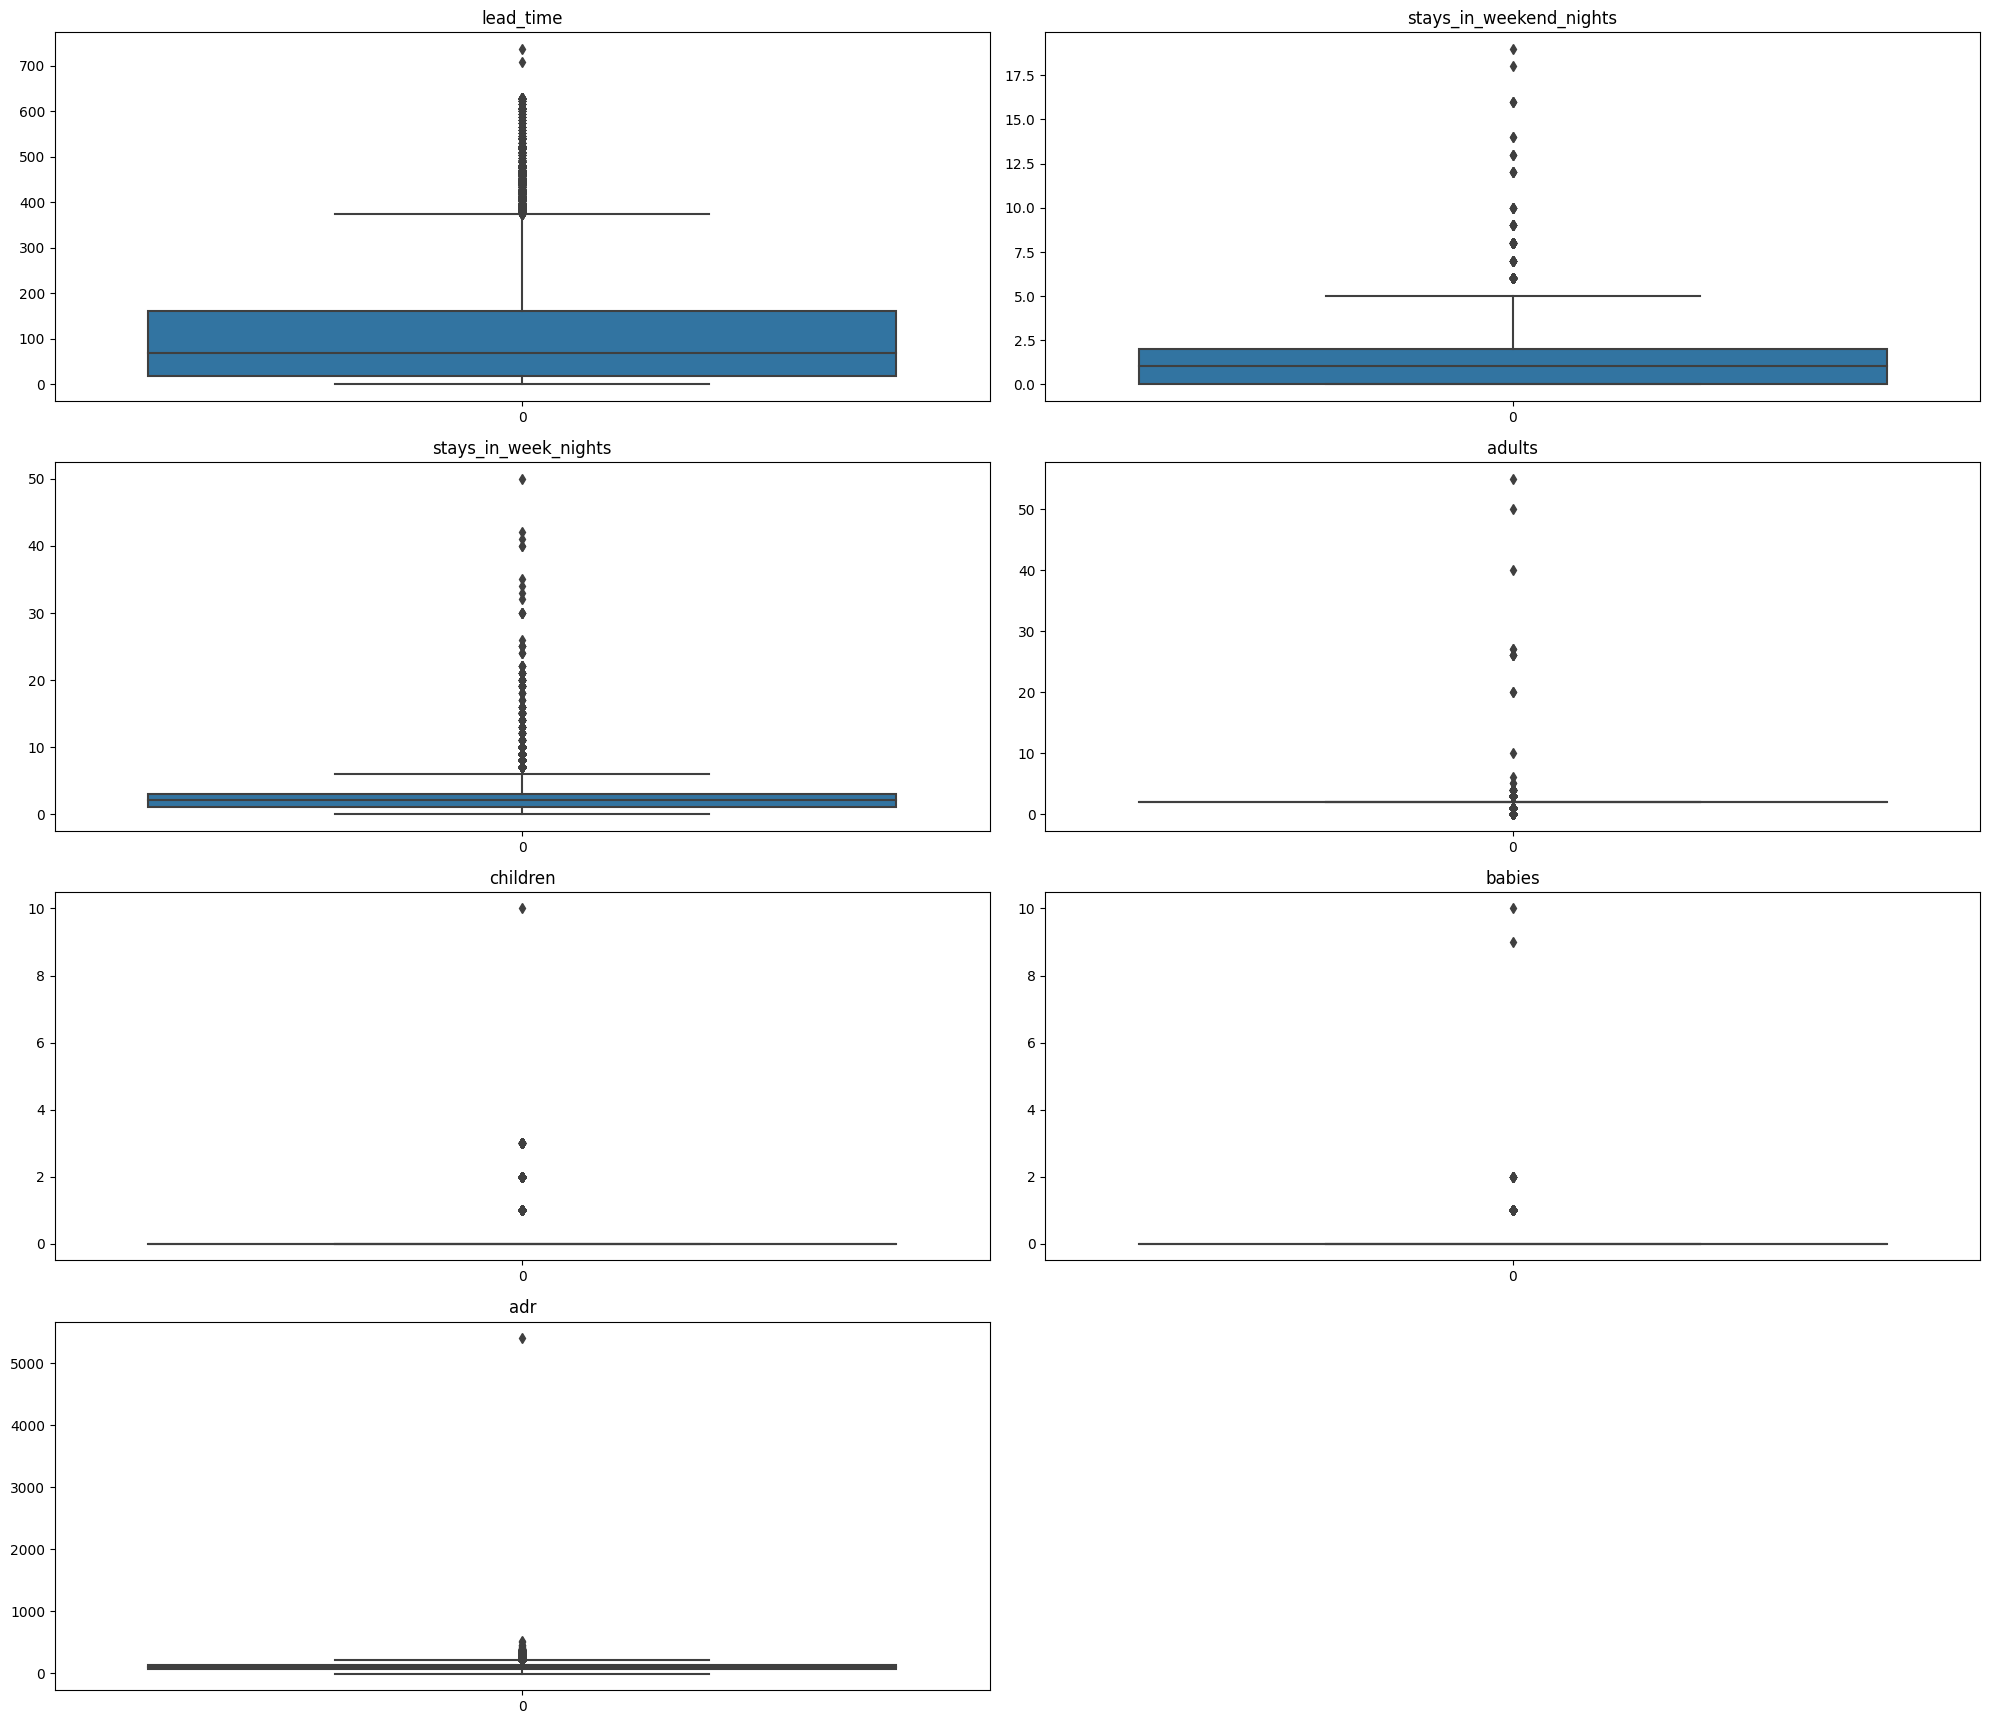

In [ ]:
# List of columns to check for outliers
kolom_yang_diperiksa = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr']
plt.figure(figsize=(20,30))

# Melakukan perulangan untuk setiap kolom yang akan diperiksa
for i, kolom in enumerate(kolom_yang_diperiksa):
    plt.subplot(7, 2, i+1)
    sns.boxplot(df[kolom])
    plt.title(kolom)

# Mengatur tata letak subplot agar lebih rapi
plt.tight_layout()
plt.show()

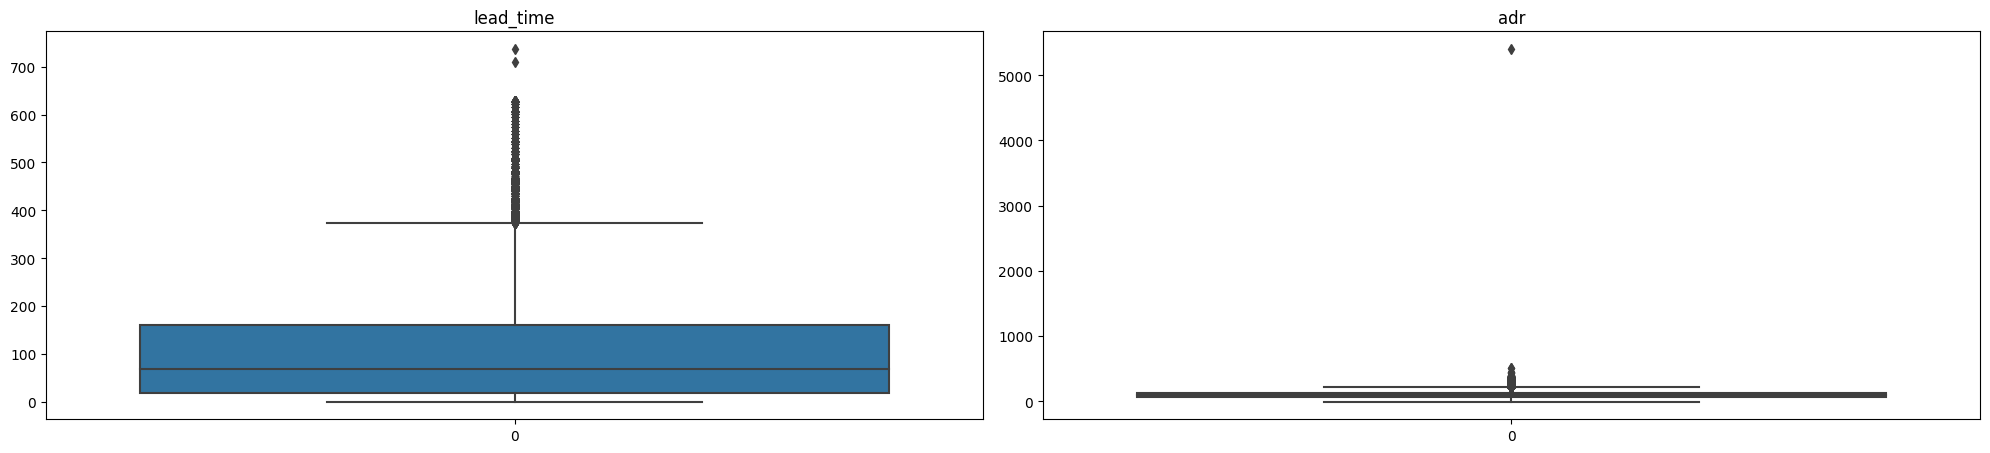

In [ ]:
# Daftar kolom untuk memeriksa adanya outlier
kolom_yang_diperiksa = ['lead_time','adr']

# Menampilkan boxplot untuk kolom-kolom ini
plt.figure(figsize=(20,30))

# Melakukan perulangan untuk setiap kolom yang akan diperiksa
for i, kolom in enumerate(kolom_yang_diperiksa):
    plt.subplot(7, 2, i+1)
    sns.boxplot(df[kolom])
    plt.title(kolom)

# Mengatur tata letak subplot agar lebih rapi
plt.tight_layout()
plt.show()


 menghapus nilai 0 apa pun dari kolom adults  karena kumpulan data harus mencakup pemesanan yang memiliki setidaknya satu orang dewasa

In [ ]:
# Remove rows where the number of adults is 0
# Hapus baris yang jumlah orang dewasanya 0
df = df[df['adults'] != 0]
(df['adults'] == 0).any()

False

In [ ]:
df['adr'].median()

95.0

mengganti nilai minimum dan maksimum pada kolom 'adr' dengan nilai median. 'adr' adalah kolom yang menunjukkan Average Daily Rate atau rata-rata harga kamar per hari. Dalam analisis data, seringkali kita perlu mengatasi nilai-nilai ekstrim atau outlier yang dapat mempengaruhi hasil analisis. Dalam hal ini, nilai minimum dan maksimum pada kolom 'adr' dapat dianggap sebagai outlier dan diganti dengan nilai median agar tidak mempengaruhi hasil analisis.

In [ ]:
# Replace the minimum and maximum values in 'adr' column with the median
adr_median = df['adr'].median()
adr_min = df['adr'].min()
adr_max = df['adr'].max()

#Mengganti nilai minimum dan maksimum pada kolom 'adr' dengan nilai median:

df.loc[df['adr'] == adr_min, 'adr'] = adr_median
df.loc[df['adr'] == adr_max, 'adr'] = adr_median
#Menampilkan deskripsi statistik dari dataset setelah nilai minimum dan maksimum pada kolom 'adr' diganti dengan nilai median:
df.describe(include='all')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,118987,118987.000000,118987.000000,118987.000000,118987,118987.000000,118987.000000,118987.00000,118987.000000,118987.000000,118983.000000,118987.000000,118987,118987,118987,118987,118987.000000,118987.000000,118987.000000,118987,118987,118987.000000,118987,118987.000000,118987.000000,118987,118987.000000,118987.000000,118987.000000,118987,118987
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,178,8,5,NaN,NaN,NaN,9,11,NaN,3,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,78940,NaN,NaN,NaN,13829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92020,48440,56221,97560,NaN,NaN,NaN,85863,73983,NaN,104238,NaN,NaN,89337,NaN,NaN,NaN,74872,1460
mean,NaN,0.370755,104.070537,2016.156362,NaN,27.164144,15.796768,0.92695,2.499046,1.862691,0.100435,0.007950,NaN,NaN,NaN,NaN,0.031550,0.087337,0.137343,NaN,NaN,0.218528,NaN,75.012573,2.325565,NaN,101.964343,0.062654,0.570642,NaN,NaN
std,NaN,0.483009,106.890775,0.707742,NaN,13.598809,8.781186,0.99527,1.897763,0.570060,0.390222,0.097473,NaN,NaN,NaN,NaN,0.174799,0.845693,1.499527,NaN,NaN,0.638088,NaN,107.230963,17.614198,NaN,48.052934,0.245544,0.792400,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.00000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,7.000000,0.000000,NaN,69.500000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.00000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,0.000000,NaN,95.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.00000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,154.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


Rekayasa Fitur Buat peta untuk nama Musim (seasons) dan Hari Kerja untuk analisis dan visualisasi data kami

Menambahkan dua kolom baru pada dataset 'df', yaitu 'season' dan 'day_of_week', dan menghapus kolom 'date' yang tidak diperlukan lagi
. Dalam hal ini, kolom 'season' dan 'day_of_week' dapat membantu kita memahami pola kunjungan tamu ke hotel dan memprediksi tingkat hunian hotel di masa depan.

In [ ]:
#Mengimpor library yang diperlukan
import calendar
from datetime import datetime

# Map from month to season (for Northern hemisphere)
# Membuat dictionary 'seasons' yang berisi daftar bulan untuk setiap musim di belahan bumi utara:

seasons = {
    'Winter': ['December', 'January', 'February'],
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Autumn': ['September', 'October', 'November']
}

# Function to map a month to a season
#Membuat fungsi 'month_to_season' yang akan digunakan untuk memetakan setiap bulan ke musim yang sesuai:
def month_to_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

# Create 'season' column
# Menambahkan kolom 'season' pada dataset 'df' dengan menggunakan fungsi 'month_to_season':
df['season'] = df['arrival_date_month'].apply(month_to_season)

# Create 'day_of_week' column
# Membuat kolom 'date' yang berisi tanggal kedatangan tamu dalam format datetime:
df['date'] = df.apply(lambda row: datetime.strptime(f"{int(row['arrival_date_year'])} {row['arrival_date_month']} {int(row['arrival_date_day_of_month'])}", "%Y %B %d"), axis=1)
df['day_of_week'] = df['date'].dt.day_name()

# Drop the 'date' column as we no longer need it
#Menghapus kolom 'date' yang tidak diperlukan lagi:
df = df.drop(columns=['date'])

mengkategorikan tipe tamu berdasarkan jumlah orang dewasa, anak-anak, dan bayi yang ada dalam satu kelompok. Kategori tipe tamu yang ditentukan adalah 'Single' (untuk tamu sendiri), 'Couple' (untuk pasangan), 'Group' (untuk kelompok dengan lebih dari 2 orang dewasa), dan 'Family' (untuk keluarga dengan anak-anak dan/atau bayi).

In [ ]:
# Function to categorize group type
def guest_type(row):
    if row['adults'] == 1 and row['children'] == 0 and row['babies'] == 0:
        return 'Single'
    elif row['adults'] == 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Couple'
    elif row['adults'] > 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Group'
    else:
        return 'Family'

# Apply the function to the dataframe
df['guest_type'] = df.apply(guest_type, axis=1)

# Display the first few rows of the dataframe to confirm
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,season,day_of_week,guest_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Summer,Wednesday,Couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Summer,Wednesday,Couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Summer,Wednesday,Single
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Summer,Wednesday,Single
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Summer,Wednesday,Couple


In [ ]:
df.to_csv('hasil_Cleaning_hotel_bookings.csv', index=False)
df = pd.read_csv('hasil_Cleaning_hotel_bookings.csv')

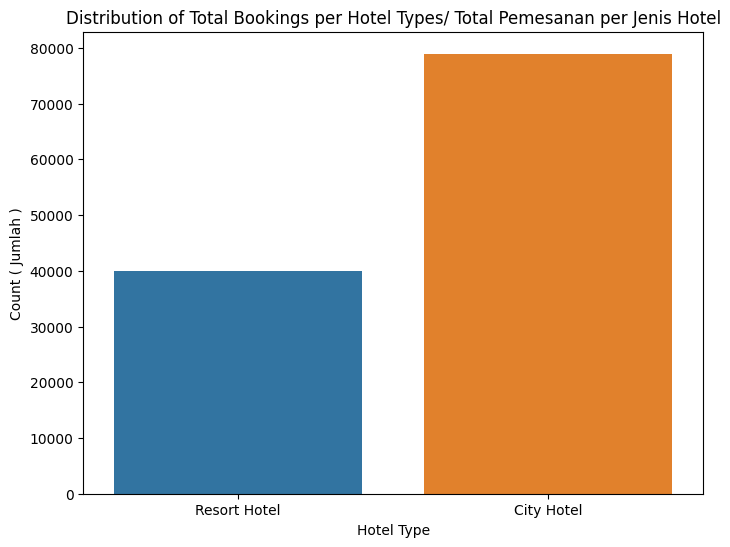

In [ ]:

# Plot distribution of hotel types
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', data=df)
plt.title('Distribution of Total Bookings per Hotel Types/ Total Pemesanan per Jenis Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Count ( Jumlah )') #menambahkan label pada sumbu y, yang dalam hal ini akan menjadi "Count" atau "Jumlah"
plt.show()


Distribusi pemesanan antara kedua jenis hotel dalam kumpulan data menunjukkan bahwa City Hotel memiliki pemesanan yang jauh lebih banyak dibandingkan Resort Hotel

**Tarif rata-rata harian (ADR) lebih tinggi untuk City Hotel dibandingkan dengan Resort **

In [ ]:
# Tarif Harian Rata-rata vs Hotel
#diagram box plot yang membandingkan Tarif Harian Rata-rata (ADR)
adr_vs_hotel = px.box(df, x="hotel", y="adr",color="hotel")
adr_vs_hotel.show()

 ADR untuk kedua jenis hotel ini berbeda-beda, dan City Hotel memiliki jangkauan yang lebih luas. City Hotel juga memiliki ADR maksimum yang lebih tinggi dibandingkan Resort Hotel

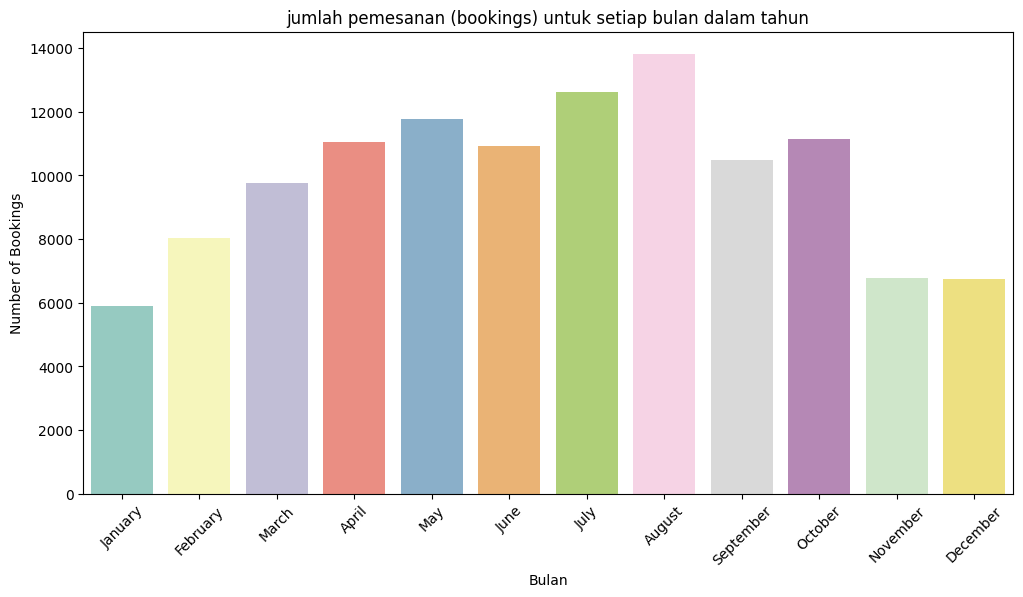

In [ ]:
# jumlah pemesanan (bookings) untuk setiap bulan dalam tahun (Number of Bookings for Each Month)
# Import library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Urutan bulan
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Palet warna yang berbeda
colors = sns.color_palette('Set3', len(months_order))

# Plot jumlah pemesanan untuk setiap bulan
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=df, order=months_order, palette=colors)
plt.title('jumlah pemesanan (bookings) untuk setiap bulan dalam tahun')
plt.xlabel('Bulan')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


Total ADR tertinggi pada bulan Agustus dan terendah pada bulan Januari, sesuai dengan jumlah pemesanan setiap bulannya

Tujuan dari kode ini adalah untuk menghitung rata-rata ADR (Average Daily Rate) untuk setiap tipe hotel dan menampilkan hasilnya dalam bentuk bar plot menggunakan library Seaborn

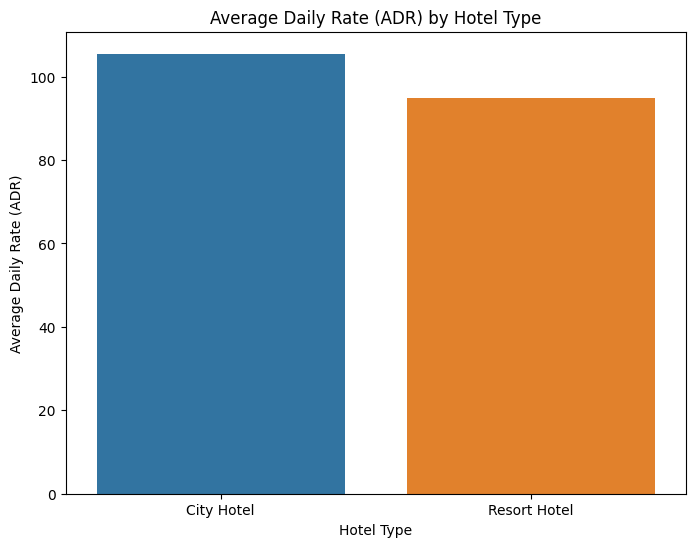

In [ ]:
#Tujuan dari kode ini adalah untuk menghitung rata-rata ADR (Average Daily Rate) untuk setiap tipe hotel dan menampilkan hasilnya dalam bentuk bar plot menggunakan library Seaborn
#Menghitung rata-rata ADR untuk setiap tipe hotel menggunakan metode groupby pada kolom 'hotel' dan mean pada kolom 'adr'. Hasilnya disimpan dalam variabel hotel_adr_mean
hotel_adr_mean = df.groupby('hotel')['adr'].mean().reset_index()

#Membuat bar plot menggunakan library Seaborn dengan menggunakan data dari variabel hotel_adr_mean.
# Pada sumbu x, digunakan kolom 'hotel', sedangkan pada sumbu y, digunakan kolom 'adr'. Judul plot, label sumbu x, dan label sumbu y
#juga ditambahkan untuk memberikan informasi yang jelas tentang plot tersebut.

plt.figure(figsize=(8, 6))
sns.barplot(x='hotel', y='adr', data=hotel_adr_mean)
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()